# Car Crash Factors: Exploratory Data Analysis

## 1. Introduction

The objective of this Exploratory Data Analysis (EDA) is to explore and understand the factors influencing vehicle accidents. The dataset, sourced from [Data.Gov](https://catalog.data.gov/dataset/crash-reporting-drivers-data), provides comprehensive information on road accidents, such as collision severity, weather conditions, road types, and contributing elements, offering valuable insights for the analysis and enhancement of overall road safety measures.

### Research Questions
- **Route Types and Accidents:**
    - Which route types have the highest frequency of accidents?

- **Car Types in Accidents:**
    - What are the most common car types involved in accidents?

- **Frequency of Accidents:**
    - Are certain car types more likely to be involved in accidents at specific times of the day or week?

- **Agency and Substance-Induced Incidents:**
    - Are there specific times or conditions under which substance-induced incidents are more prevalent?

- **Environmental Conditions and Crash Frequency:**
    - How do different weather conditions affect the frequency and severity of crashes?

- **Vehicle Movement vs. Collision Type:**
    - How does vehicle movement at the time of the accident affect the severity of the collision?

### Purpose and Importance
These questions can help uncover meaningful insights into the multifaceted nature of vehicle accidents, including route types, vehicle characteristics, and environmental conditions. By leveraging these insights, policymakers and transportation authorities can implement targeted interventions to enhance road safety, reduce accident rates, and minimize injury severity.

## 2. Data Overview

### Data Acquisition

The data provided by Data.Gov can be accessed through the link provided below:
- [Download Data](https://catalog.data.gov/dataset/crash-reporting-drivers-data)

### Key Features of the Dataset

- Agency Name	
- ACRS Report Type	
- Crash Date/Time	
- Route Type	
- Collision Type	
- Weather	Surface Condition	
- Driver Substance Abuse	
- Vehicle Damage Extent	
- Vehicle Body Type	
- Vehicle Movement	
- Speed Limit	
- Vehicle Make	
- Vehicle Model	
- Latitude	
- Longitude

### Notice
Please note that the dataset is highly biased, primarily concerning Montgomery County. This data does not accurately represent all car crashes overall.

<br>

## 3. Initial Data Exploration

In this section, the necessary libraries and datasets needed for analysis will be imported and initialized.

The following libraries are used:
- Library `pandas` will be required to work with data in tabular representation.

- Library `numpy` will be required to round the numerical data.

- Library `scipy` will be required to visualize statistical values in the data.

- Library `matplotlib`, `seaborn`, `plotly` will be required for data visualization.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Settings
sns.set_theme(style="darkgrid")
pd.set_option('display.max_rows', 10)
pio.renderers.default = 'notebook'

# Set up logging
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Import data and save it as DataFrame
data_df = pd.read_csv('/kaggle/input/crash-reporting-drivers-data/crash_reports.csv', low_memory=False)

In [3]:
# Dimensions of the data
print(f'The data contains {data_df.shape[0]} records and {data_df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{data_df.dtypes.value_counts()}')

# Display driver data
data_df.head()

The data contains 194726 records and 39 columns.

The data contains the following data types: 
object     35
int64       2
float64     2
Name: count, dtype: int64


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


The data imported is quite large, with 194726 records and 39 columns. Before pre-processing all of this data, it can be beneficial to drop the values that will not be used throughout this analysis. `Local Case Number`, `Report Number`, `Cross-Street Name`, `Road Name`, `Off-Road Description`, `Municipality`, `Non-Motorist Substance Abuse`, `Person ID`, `Circumstance`, `Traffic Control`, `Drivers License State`, `Vehicle ID`, `Parked Vehicle`, `Driverless Vehicle`, and `Location` will be dropped. 

In [4]:
# Drop data that's not needed
df_copy = data_df.copy()
df_copy.drop(['Local Case Number', 'Report Number', 'Road Name', 'Traffic Control', 'Cross-Street Name', 'Off-Road Description', 'Related Non-Motorist', 'Municipality', 'Non-Motorist Substance Abuse', 'Vehicle First Impact Location', 'Person ID', 'Circumstance', 'Drivers License State', 'Vehicle ID', 'Parked Vehicle', 'Driverless Vehicle', 'Location'], axis=1, inplace=True)

In [5]:
# Dimensions of the data
print(f'The data contains {df_copy.shape[0]} records and {df_copy.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{df_copy.dtypes.value_counts()}')

# Display driver data
df_copy.head()

The data contains 194726 records and 22 columns.

The data contains the following data types: 
object     18
int64       2
float64     2
Name: count, dtype: int64


,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Driver At Fault,...,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NONE DETECTED,No,...,SUPERFICIAL,OTHER,PARKED,NaN,0,2017,HINO,TWK,38.987657,-76.987545
1,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,UNKNOWN,Yes,...,UNKNOWN,PASSENGER CAR,PARKING,South,5,2012,TOYOTA,SU,39.039917,-77.053649
2,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,Yes,...,NO DAMAGE,PASSENGER CAR,BACKING,West,15,2015,MAZD,TK,38.743373,-77.546997
3,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NONE DETECTED,Unknown,...,NO DAMAGE,PASSENGER CAR,MOVING CONSTANT SPEED,Unknown,15,2018,RAM,TK,39.145873,-77.191940
4,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,NaN,No,...,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,South,35,2017,AUDI,A3,39.025170,-77.076333


<br>

## 4. Data Cleaning and Preprocessing

In this section, data pre-processing will be conducted by examining data types, addressing missing values, removing duplicates, analyzing measures of central tendency, and extracting features.

In [6]:
# Initialize a list to store the results
missing_vals = []

# Check percentage of missing data
for col in df_copy.columns:
    pct_missing = df_copy[col].isnull().mean()
    missing_vals.append(f'{col} - {pct_missing:.0%}')

# Join the results into a single string and print
print(', '.join(missing_vals))

Agency Name - 0%, ACRS Report Type - 0%, Crash Date/Time - 0%, Route Type - 10%, Collision Type - 0%, Weather - 7%, Surface Condition - 11%, Light - 1%, Driver Substance Abuse - 16%, Driver At Fault - 0%, Injury Severity - 1%, Driver Distracted By - 1%, Vehicle Damage Extent - 0%, Vehicle Body Type - 1%, Vehicle Movement - 1%, Vehicle Going Dir - 3%, Speed Limit - 0%, Vehicle Year - 0%, Vehicle Make - 0%, Vehicle Model - 0%, Latitude - 0%, Longitude - 0%


All the columns that will be used for this analysis have been identified, thus focus can now shift towards the data rows. Since there are over 190000 rows, all the rows that contain no values can either be dropped or filled with default values. Each column must be examined to determine the appropriate method for handling missing data.

In [7]:
# Inspect values
df_copy.head(10)

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Driver At Fault,...,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NONE DETECTED,No,...,SUPERFICIAL,OTHER,PARKED,NaN,0,2017,HINO,TWK,38.987657,-76.987545
1,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,UNKNOWN,Yes,...,UNKNOWN,PASSENGER CAR,PARKING,South,5,2012,TOYOTA,SU,39.039917,-77.053649
2,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,Yes,...,NO DAMAGE,PASSENGER CAR,BACKING,West,15,2015,MAZD,TK,38.743373,-77.546997
3,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NONE DETECTED,Unknown,...,NO DAMAGE,PASSENGER CAR,MOVING CONSTANT SPEED,Unknown,15,2018,RAM,TK,39.145873,-77.191940
4,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,NaN,No,...,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,South,35,2017,AUDI,A3,39.025170,-77.076333
5,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NONE DETECTED,No,...,FUNCTIONAL,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,East,30,2010,MERCEDES,ML360,39.116462,-77.050530
6,Montgomery County Police,Property Damage Crash,07/27/2023 12:30:00 PM,County,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NONE DETECTED,No,...,FUNCTIONAL,PASSENGER CAR,MOVING CONSTANT SPEED,East,30,2022,HOND,PILOT,39.000144,-77.109881
7,Montgomery County Police,Injury Crash,12/29/2023 04:40:00 PM,County,SINGLE VEHICLE,CLOUDY,DRY,DAYLIGHT,UNKNOWN,Yes,...,DESTROYED,(SPORT) UTILITY VEHICLE,UNKNOWN,West,30,2005,FORD,EXPLORER,39.140092,-77.484022
8,Montgomery County Police,Property Damage Crash,11/10/2023 08:24:00 PM,Maryland (State),SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,NONE DETECTED,No,...,FUNCTIONAL,PASSENGER CAR,STOPPED IN TRAFFIC LANE,South,35,2016,TOYOTA,CAMRY,39.072460,-77.064860
9,Montgomery County Police,Property Damage Crash,10/16/2023 07:33:00 PM,Maryland (State),HEAD ON LEFT TURN,CLEAR,DRY,DARK LIGHTS ON,NONE DETECTED,Yes,...,DISABLING,PASSENGER CAR,MAKING LEFT TURN,South,35,2021,HONDA,ACCORD,39.054407,-77.050488


Values for `Route Type`, `Road Name`, `Vehicle Body Type`, `Vehicle Movement`, and `Vehicle Going Direction` should be removed due to a significant number of missing values, which cannot be inferred. The remaining missing values in other columns can be filled with a default value based on the existing data in those columns, as their percentage of missing data is relatively small.

In [8]:
# Default values
df_copy['Weather'] = df_copy['Weather'].fillna('CLEAR')
df_copy['Surface Condition'] = df_copy['Surface Condition'].fillna('DRY')
df_copy['Light'] = df_copy['Light'].fillna('DAYLIGHT')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].fillna('NONE DETECTED')
df_copy['Injury Severity'] = df_copy['Injury Severity'].fillna('NO APPARENT INJURY')
df_copy['Driver Distracted By'] = df_copy['Driver Distracted By'].fillna('UNKNOWN')

# Drop missing values
df_copy.replace('NaN', '', inplace=True)
df_copy.dropna(inplace=True)
df_copy = df_copy.reset_index(drop=True)

In [9]:
# Dimensions of the data
print(f'The data contains {df_copy.shape[0]} records and {df_copy.shape[1]} columns.')

# Count the number of rows with missing values
missing_values_count = df_copy.isna().any(axis=1).sum()
print("Missing values: ", missing_values_count)

# Inspect values
df_copy.head(2)

The data contains 167037 records and 22 columns.
Missing values:  0


,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Driver At Fault,...,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DARK LIGHTS ON,NONE DETECTED,No,...,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,South,35,2017,AUDI,A3,39.025170,-77.076333
1,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NONE DETECTED,No,...,FUNCTIONAL,(SPORT) UTILITY VEHICLE,SLOWING OR STOPPING,East,30,2010,MERCEDES,ML360,39.116462,-77.050530


**CONCLUSION:**

The dataset contains no missing values, so no additional modifications are needed.

### 4.2 Duplicates

The data can be reduced or simplified by identifying and removing duplicate entries.

In [10]:
# Check for duplicates in columns
duplicate_vals = []

for col in df_copy:
    if df_copy[col].duplicated().any() == True:
        duplicate_vals.append(f'Column {col} contains duplicates.')
    else:
        duplicate_vals.append(f'Column {col} contains no duplicates.')

# Join the results into a single string and print
print(', '.join(duplicate_vals))

Column Agency Name contains duplicates., Column ACRS Report Type contains duplicates., Column Crash Date/Time contains duplicates., Column Route Type contains duplicates., Column Collision Type contains duplicates., Column Weather contains duplicates., Column Surface Condition contains duplicates., Column Light contains duplicates., Column Driver Substance Abuse contains duplicates., Column Driver At Fault contains duplicates., Column Injury Severity contains duplicates., Column Driver Distracted By contains duplicates., Column Vehicle Damage Extent contains duplicates., Column Vehicle Body Type contains duplicates., Column Vehicle Movement contains duplicates., Column Vehicle Going Dir contains duplicates., Column Speed Limit contains duplicates., Column Vehicle Year contains duplicates., Column Vehicle Make contains duplicates., Column Vehicle Model contains duplicates., Column Latitude contains duplicates., Column Longitude contains duplicates.


Duplicate values in the dataset are understandable, as crash conditions are not unique events. However, it is important to check the data for anomalies, such as spelling errors, inconsistent casing, or typing mistakes.

In [11]:

for col in df_copy:
    if df_copy[col].dtype == 'object':
        # Strip whitespace and capitalize each word
        df_copy[col] = df_copy[col].str.strip().str.lower()
        # Print unique counts before and after stripping
        print(f'Column: {col}')
        print(f'Unique values before stripping: {len(set(df_copy[col]))}')
        print(f'Unique values after stripping: {len(set(df_copy[col]))}\n')

Column: Agency Name
Unique values before stripping: 10
Unique values after stripping: 10

Column: ACRS Report Type
Unique values before stripping: 3
Unique values after stripping: 3

Column: Crash Date/Time
Unique values before stripping: 90460
Unique values after stripping: 90460

Column: Route Type
Unique values before stripping: 19
Unique values after stripping: 19

Column: Collision Type
Unique values before stripping: 25
Unique values after stripping: 25

Column: Weather
Unique values before stripping: 17
Unique values after stripping: 17

Column: Surface Condition
Unique values before stripping: 13
Unique values after stripping: 13

Column: Light
Unique values before stripping: 11
Unique values after stripping: 11

Column: Driver Substance Abuse
Unique values before stripping: 20
Unique values after stripping: 20

Column: Driver At Fault
Unique values before stripping: 3
Unique values after stripping: 3

Column: Injury Severity
Unique values before stripping: 5
Unique values afte

In [12]:
# Frequency analysis
for col in df_copy:
    print(f'Column: {col}')
    print(df_copy[col].value_counts(), "\n")

Column: Agency Name
Agency Name
montgomery county police     122326
montgomery                    23328
rockville police departme      8580
gaithersburg police depar      6338
takoma park police depart      2252
rockville                      1589
gaithersburg                   1198
maryland-national capital       862
takoma                          383
mcpark                          181
Name: count, dtype: int64 

Column: ACRS Report Type
ACRS Report Type
property damage crash    102794
injury crash              63782
fatal crash                 461
Name: count, dtype: int64 

Column: Crash Date/Time
Crash Date/Time
12/10/2018 06:10:00 pm    11
03/03/2017 06:00:00 am    10
03/28/2019 09:30:00 am    10
06/09/2020 06:53:00 pm    10
05/02/2017 06:12:00 pm     9
                          ..
02/11/2022 08:47:00 pm     1
12/17/2016 06:37:00 pm     1
10/23/2019 08:58:00 pm     1
01/20/2016 06:21:00 pm     1
03/30/2025 04:03:00 am     1
Name: count, Length: 90460, dtype: int64 

Column: Rout

From the data above, it is clear that most values aren't standardized upon entry (for example, `Toyota` vs. `Toyt`, `Montgomery` vs `Montgomery County Police`). Manual replacements can do the bulk of the work since a fuzzer would take a lot of computational power to go through all the data.

In [13]:
# Function to replace based on keywords
def replace_vehicle_make(value):
    value_lower = value.lower()
    if 'har' in value_lower:
        return 'Harley Davidson'
    if 'chevy' in value_lower or 'chevrolet' in value_lower:
        return 'Chevrolet'
    if 'honda' in value_lower:
        return 'Honda'
    if 'toyota' in value_lower:
        return 'Toyota'
    if 'mits' in value_lower or 'mitsubishi' in value_lower:
        return 'Mitsubishi'
    if 'buic' in value_lower or 'buick' in value_lower:
        return 'Buick'
    if 'kia' in value_lower:
        return 'Kia'
    if 'hyundai' in value_lower:
        return 'Hyundai'
    if 'ford' in value_lower:
        return 'Ford'
    if 'nissan' in value_lower:
        return 'Nissan'
    if 'tesla' in value_lower:
        return 'Tesla'
    if 'bmw' in value_lower:
        return 'BMW'
    if 'mercedes' in value_lower or 'merz' in value_lower:
        return 'Mercedes-Benz'
    if 'audi' in value_lower:
        return 'Audi'
    if 'volkswagen' in value_lower or 'vw' in value_lower:
        return 'Volkswagen'
    if 'subaru' in value_lower:
        return 'Subaru'
    if 'mazda' in value_lower:
        return 'Mazda'
    if 'jeep' in value_lower:
        return 'Jeep'
    if 'dodge' in value_lower:
        return 'Dodge'
    if 'chrysler' in value_lower:
        return 'Chrysler'
    if 'lexus' in value_lower:
        return 'Lexus'
    if 'infiniti' in value_lower:
        return 'Infiniti'
    if 'acura' in value_lower:
        return 'Acura'
    if 'cadillac' in value_lower:
        return 'Cadillac'
    if 'gmc' in value_lower:
        return 'GMC'
    if 'ram' in value_lower:
        return 'Ram'
    if 'volvo' in value_lower:
        return 'Volvo'
    if 'land rover' in value_lower:
        return 'Land Rover'
    if 'jaguar' in value_lower:
        return 'Jaguar'
    if 'fiat' in value_lower:
        return 'Fiat'
    if 'mini' in value_lower:
        return 'Mini'
    if 'porsche' in value_lower:
        return 'Porsche'
    if 'lincoln' in value_lower:
        return 'Lincoln'
    else:
        return 'Other'

# Apply the function to the column
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].apply(replace_vehicle_make)

# Display the value counts
print(df_copy['Vehicle Make'].value_counts())

Vehicle Make
Other              47841
Toyota             23873
Honda              19420
Ford               16307
Nissan              8614
                   ...  
Land Rover           209
Harley Davidson      208
Porsche              168
Jaguar               131
Fiat                 106
Name: count, Length: 34, dtype: int64


In [14]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'dark' in value_lower:
        return 'night'
    if 'day' in value_lower:
        return 'day'
    if 'dusk' in value_lower:
        return 'dusk'
    if 'dawn' in value_lower:
        return 'dawn'
    else:
        return 'other'

# Apply the function to the column
df_copy['Light'] = df_copy['Light'].apply(replacements)

# Display the value counts
print(df_copy['Light'].value_counts())

Light
day      113658
night     45740
dusk       3723
dawn       3363
other       553
Name: count, dtype: int64


In [15]:
df_copy['Driver Substance Abuse'].value_counts()

Driver Substance Abuse
none detected                                          138388
not suspect of alcohol use, not suspect of drug use     14446
unknown                                                  7112
alcohol present                                          3605
alcohol contributed                                      1277
                                                        ...  
unknown, not suspect of drug use                           35
suspect of alcohol use, suspect of drug use                30
not suspect of alcohol use, unknown                        24
not suspect of alcohol use, suspect of drug use            20
unknown, suspect of drug use                                5
Name: count, Length: 20, dtype: int64

In [16]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'none' in value_lower or 'unknown' in value_lower or 'not' in value_lower:
        return 'none detected'
    if 'alcohol' in value_lower:
        return 'alcohol contributed'
    if 'drug' in value_lower:
        return 'drugs contributed'
    if 'medication' in value_lower:
        return 'medication contributed'
    if 'combin' in value_lower:
        return 'combination contributed'
    else:
        return value

# Apply the function to the column
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].apply(replacements)

# Display the value counts
print(df_copy['Driver Substance Abuse'].value_counts())

Driver Substance Abuse
none detected              161481
alcohol contributed          4912
drugs contributed             319
medication contributed        153
combination contributed       122
other                          50
Name: count, dtype: int64


In [17]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'clear' in value_lower:
        return 'clear'
    if 'cloud' in value_lower:
        return 'cloudy'
    if 'rain' in value_lower:
        return 'rainy'
    else:
        return 'clear'

# Apply the function to the column
df_copy['Weather'] = df_copy['Weather'].apply(replacements)

In [18]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'wet' in value_lower:
        return 'wet'
    else:
        return 'dry'

# Apply the function to the column
df_copy['Surface Condition'] = df_copy['Surface Condition'].apply(replacements)

In [19]:
def replacements(value):
    value_lower = value.lower()
    if 'motorcycle' in value_lower:
        return 'Motorcycle'
    if 'aveo' in value_lower:
        return 'Aveo'
    if 'crv' in value_lower:
        return 'CR-V'
    if 'corolla' in value_lower:
        return 'Corolla'
    if 'suv' in value_lower:
        return 'SUV'
    if '4s' in value_lower:
        return 'Sedan'
    if 'sw' in value_lower:
        return 'Station Wagon'
    if 'sonata' in value_lower:
        return 'Sonata'
    if 'f150' in value_lower:
        return 'F-150'
    if 'altima' in value_lower:
        return 'Altima'
    else:
        return value

# Apply the function to the columns
df_copy['Vehicle Model'] = df_copy['Vehicle Model'].apply(replacements)

In [20]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'u-turn' in value_lower or 'u turn' in value_lower:
        return 'U-Turn'
    if 'left' in value_lower:
        return 'Turning Left'
    if 'right' in value_lower:
        return 'Turning Right'
    if 'driverless' in value_lower:
        return 'other'
    if 'passing' in value_lower or 'overtaking' in value_lower:
        return 'overtaking'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Vehicle Movement'] = df_copy['Vehicle Movement'].apply(replacements)

In [21]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'south' in value_lower:
        return 'south'
    if 'east' in value_lower:
        return 'east'
    if 'north' in value_lower:
        return 'north'
    if 'west' in value_lower:
        return 'west'
    if 'not ' in value_lower:
        return 'unknown'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Vehicle Going Dir'] = df_copy['Vehicle Going Dir'].apply(replacements)

In [22]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'mongomery' in value_lower or 'ontgomery' in value_lower:
        return 'montgomery county police'
    if 'rockville' in value_lower:
        return 'rockville park police department'
    elif 'gaithersburg' in value_lower:
        return 'gaithersburg park police department'
    elif 'takoma' in value_lower:
        return 'takoma park police department'
    elif 'mcpark' in value_lower:
        return 'mcpark park police department'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Agency Name'] = df_copy['Agency Name'].apply(replacements)

In [23]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'maryland' in value_lower or 'us' in value_lower or 'state' in value_lower or 'local' in value_lower:
        return 'state route'
    if 'county' in value_lower:
        return 'county route'
    elif 'municipality' in value_lower:
        return 'municipality route'
    elif 'government' in value_lower:
        return 'government route'
    elif 'interstate' in value_lower:
        return 'interstate route'
    elif 'public' in value_lower:
        return 'public road'
    elif 'private' in value_lower:
        return 'private road'
    elif 'spur' in value_lower or 'crossover' in value_lower or 'unknown' in value_lower:
        return 'other'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Route Type'] = df_copy['Route Type'].apply(replacements)

In [24]:
# Function to replace based on keywords
def replacements(value):
    value_lower = value.lower()
    if 'not' in value_lower:
        return 'unknown'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Vehicle Damage Extent'] = df_copy['Vehicle Damage Extent'].apply(replacements)

In [25]:
# Function to replace based on keywords
def replace_vehicle_type(value):
    value_lower = value.lower()
    if 'passenger' in value_lower or 'low' in value_lower or 'sedan' in value_lower:
        return 'passenger'
    elif 'van' in value_lower:
        return 'van'
    elif 'truck' in value_lower or 'pickup' in value_lower:
        return 'truck'
    elif 'all-terrain' in value_lower or 'all terrain' in value_lower or '4x4' in value_lower:
        return 'off-road'
    elif 'sport' in value_lower or 'convertible' in value_lower:
        return 'sport'
    elif 'bus' in value_lower:
        return 'bus'
    elif 'motorcycle' in value_lower or 'motorized' in value_lower or 'moped' in value_lower or 'scooter' in value_lower:
        return 'motorcycle'
    elif 'limousine' in value_lower or 'luxury' in value_lower or 'executive' in value_lower:
        return 'luxury'
    elif 'equipment' in value_lower or 'heavy-duty' in value_lower or 'farm' in value_lower or 'industrial' in value_lower:
        return 'heavy-duty'
    elif 'recreational' in value_lower or 'snowmobile' in value_lower or 'atv' in value_lower:
        return 'recreational'
    elif 'utility' in value_lower or 'emergency' in value_lower or 'station wagon' in value_lower or 'service' in value_lower:
        return 'utility'
    else:
        return value  # or return a default value if needed

# Apply the function to the column
df_copy['Vehicle Body Type'] = df_copy['Vehicle Body Type'].apply(replace_vehicle_type)


In [26]:
# Title case results
for col in df_copy:
    if df_copy[col].dtype == 'object':
        # Strip whitespace and capitalize each word
        df_copy[col] = df_copy[col].str.strip().str.title()
df_copy.head()

,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Driver At Fault,...,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 Pm,State Route,Straight Movement Angle,Clear,Dry,Night,None Detected,No,...,Disabling,Passenger,Moving Constant Speed,South,35,2017,Audi,A3,39.025170,-77.076333
1,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 Am,State Route,Same Dir Rear End,Cloudy,Dry,Day,None Detected,No,...,Functional,Sport,Slowing Or Stopping,East,30,2010,Mercedes-Benz,Ml360,39.116462,-77.050530
2,Montgomery County Police,Property Damage Crash,07/27/2023 12:30:00 Pm,County Route,Straight Movement Angle,Clear,Dry,Day,None Detected,No,...,Functional,Passenger,Moving Constant Speed,East,30,2022,Other,Pilot,39.000144,-77.109881
3,Montgomery County Police,Injury Crash,12/29/2023 04:40:00 Pm,County Route,Single Vehicle,Cloudy,Dry,Day,None Detected,Yes,...,Destroyed,Sport,Unknown,West,30,2005,Ford,Explorer,39.140092,-77.484022
4,Montgomery County Police,Property Damage Crash,11/10/2023 08:24:00 Pm,State Route,Same Dir Rear End,Clear,Dry,Night,None Detected,No,...,Functional,Passenger,Stopped In Traffic Lane,South,35,2016,Toyota,Camry,39.072460,-77.064860


**CONCLUSION:** 

The data was processed to the point where only valid duplicates exist. Therefore, no further data transformation is necessary.

### 4.3 Transformation

In [27]:
# Check column data type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167037 entries, 0 to 167036
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Agency Name             167037 non-null  object 
 1   ACRS Report Type        167037 non-null  object 
 2   Crash Date/Time         167037 non-null  object 
 3   Route Type              167037 non-null  object 
 4   Collision Type          167037 non-null  object 
 5   Weather                 167037 non-null  object 
 6   Surface Condition       167037 non-null  object 
 7   Light                   167037 non-null  object 
 8   Driver Substance Abuse  167037 non-null  object 
 9   Driver At Fault         167037 non-null  object 
 10  Injury Severity         167037 non-null  object 
 11  Driver Distracted By    167037 non-null  object 
 12  Vehicle Damage Extent   167037 non-null  object 
 13  Vehicle Body Type       167037 non-null  object 
 14  Vehicle Movement    

Time objects will need to be converted to `datetime` values.

In [28]:
# Convert 'Crash Date/Time' to datetime
df_copy['Crash Date/Time'] = pd.to_datetime(df_copy['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p')

# Extract date and time into separate columns
df_copy['Date'] = df_copy['Crash Date/Time'].dt.date
df_copy['Time'] = df_copy['Crash Date/Time'].dt.time

# Convert 'Date' to datetime format (with only date)
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

# Drop the original 'Crash Date/Time' column
df_copy.drop('Crash Date/Time', axis=1, inplace=True)

Data types classified as `object` typically consume more memory than other data types, which can result in delays during program execution. Consequently, these data types are good candidates for conversion to `categorical`. A categorical variable has a limited and often fixed number of possible values. 

In [29]:
# Convert object dtype columns to category dtype
for col in df_copy.select_dtypes(include=['object']).columns:
    if col != 'Time':
        df_copy[col] = df_copy[col].astype('category')

# Verify the conversion
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167037 entries, 0 to 167036
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Agency Name             167037 non-null  category      
 1   ACRS Report Type        167037 non-null  category      
 2   Route Type              167037 non-null  category      
 3   Collision Type          167037 non-null  category      
 4   Weather                 167037 non-null  category      
 5   Surface Condition       167037 non-null  category      
 6   Light                   167037 non-null  category      
 7   Driver Substance Abuse  167037 non-null  category      
 8   Driver At Fault         167037 non-null  category      
 9   Injury Severity         167037 non-null  category      
 10  Driver Distracted By    167037 non-null  category      
 11  Vehicle Damage Extent   167037 non-null  category      
 12  Vehicle Body Type       167037

**CONCLUSION:** 

All data are in the correct types and formats; therefore, no further data transformation is needed.

### 4.4 Feature Engineering

Sorting the columns by `Agency Name` will facilitate analysis and improve readability.

In [30]:
# Sort the DataFrame by 'Agency Name ' in descending order
df_copy = df_copy.sort_values(by='Agency Name', ascending=True).reset_index(drop=True)
df_copy.head(2)

,Agency Name,ACRS Report Type,Route Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Driver At Fault,Injury Severity,...,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Date,Time
0,Gaithersburg Park Police Department,Property Damage Crash,Municipality Route,Same Dir Rear End,Clear,Dry,Day,None Detected,No,No Apparent Injury,...,Stopped In Traffic Lane,East,0,2017,Honda,Cr-V,39.140030,-77.195625,2021-04-08,17:30:00
1,Gaithersburg Park Police Department,Injury Crash,Municipality Route,Same Dir Rear End,Clear,Dry,Night,None Detected,No,Possible Injury,...,Stopped In Traffic Lane,North,0,2005,Toyota,Sedan,39.156693,-77.216582,2018-01-03,20:00:00


**CONCLUSION:** 

All essential data columns, formatting, and feature engineering have been applied; therefore, no further data transformation is necessary.

### 4.5 Outliers

Outliers can distort and mislead the analysis process, resulting in inaccurate predictions and insights. Therefore, addressing outliers is essential when preparing data for analysis or machine learning models. 

Generating summary statistics is a quick and effective way to assess whether a dataset contains outliers.

In [31]:
# Check summary statistics
df_copy.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude,Date
count,167037.000000,167037.000000,167037.000000,167037.000000,167037
mean,34.935823,1998.415728,39.083229,-77.111996,2019-10-19 22:13:44.368253952
min,0.000000,0.000000,37.720000,-79.486000,2015-01-01 00:00:00
25%,30.000000,2006.000000,39.023973,-77.188178,2017-04-05 00:00:00
50%,35.000000,2012.000000,39.074705,-77.104695,2019-06-27 00:00:00
75%,40.000000,2016.000000,39.139283,-77.039353,2022-06-02 00:00:00
max,75.000000,9999.000000,39.988369,-75.527708,2025-04-02 00:00:00
std,8.139770,219.873164,0.072024,0.097764,NaN


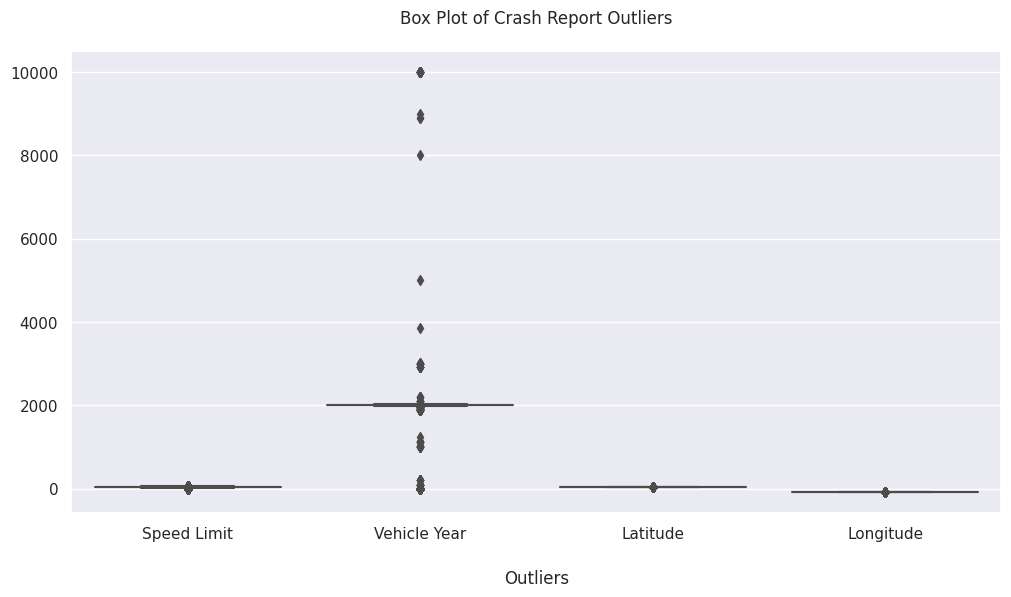

In [32]:
# Visualize with a box plot for all years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy)
plt.title('Box Plot of Crash Report Outliers', pad=20)
plt.xticks(rotation=0)
plt.xlabel('Outliers', labelpad=20)
plt.show()

The data from `Vehicle Year` column shows plenty of outliers. To further analyze this, we can employ statistical measures such as calculating the Z-score and the Interquartile Range (IQR).

In [33]:
# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df_copy["Vehicle Year"]))
outliers_z = (z_scores > 3)

# Identify outliers using IQR
Q1 = df_copy["Vehicle Year"].quantile(0.25)
Q3 = df_copy["Vehicle Year"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_copy["Vehicle Year"] < (Q1 - 1.5 * IQR)) | (df_copy["Vehicle Year"] > (Q3 + 1.5 * IQR))

# Print outliers
print("Outliers detected using Z-score:\n", df_copy[outliers_z])
print("Outliers detected using IQR:\n", df_copy[outliers_iqr])

Outliers detected using Z-score:
                                 Agency Name       ACRS Report Type  \
3       Gaithersburg Park Police Department  Property Damage Crash   
31      Gaithersburg Park Police Department  Property Damage Crash   
47      Gaithersburg Park Police Department           Injury Crash   
120     Gaithersburg Park Police Department           Injury Crash   
240     Gaithersburg Park Police Department  Property Damage Crash   
...                                     ...                    ...   
166596        Takoma Park Police Department  Property Damage Crash   
166661        Takoma Park Police Department  Property Damage Crash   
166734        Takoma Park Police Department  Property Damage Crash   
166802        Takoma Park Police Department  Property Damage Crash   
166885        Takoma Park Police Department  Property Damage Crash   

                Route Type             Collision Type Weather  \
3       Municipality Route          Head On Left Turn   Rain

The analysis of the z-scores and outliers indicates that the identified outliers correspond to vehicle years that have never been recorded (indicated as `0`). Additionally, many makes and models of the vehicles in question have been omitted from the dataset. These outliers can be removed without issue, as there is sufficient data remaining in the entire dataset to compensate for their removal and still provide valuable insights.

In [34]:
# Remove outliers
df_copy = df_copy[~outliers_iqr]
print("Outliers detected using IQR:\n", df_copy[outliers_iqr].value_counts())
print(f'The data contains {df_copy.shape[0]} records and {df_copy.shape[1]} columns.')

Outliers detected using IQR:
 Series([], Name: count, dtype: int64)
The data contains 165074 records and 23 columns.


**CONCLUSION:** 

There are no more outliers to account for. Thus no more transformations are required.

### 4.6 Final Modifications

The data from the final DataFrame (`df_copy`) can be exported for future analysis.

In [35]:
# File names
csv_file = 'final_data.csv' 

# Export to CSV
try:
    df_copy.to_csv(csv_file, index=False)
    print(f"Data exported to {csv_file}")
except PermissionError as e:
    print(f"Permission error while writing to {csv_file}: {e}")

Data exported to final_data.csv


<br>

## 5. Univariate Analysis

Each variable can be examined individually to understand its distribution, central tendency, and variability more clearly. This understanding is crucial for identifying the nature of the data, such as whether it is normally distributed or skewed, which is a crucial step in the data analysis process as it provides a comprehensive understanding of a single variable's purpose and characteristics. 

### 5.1 Categorical Values

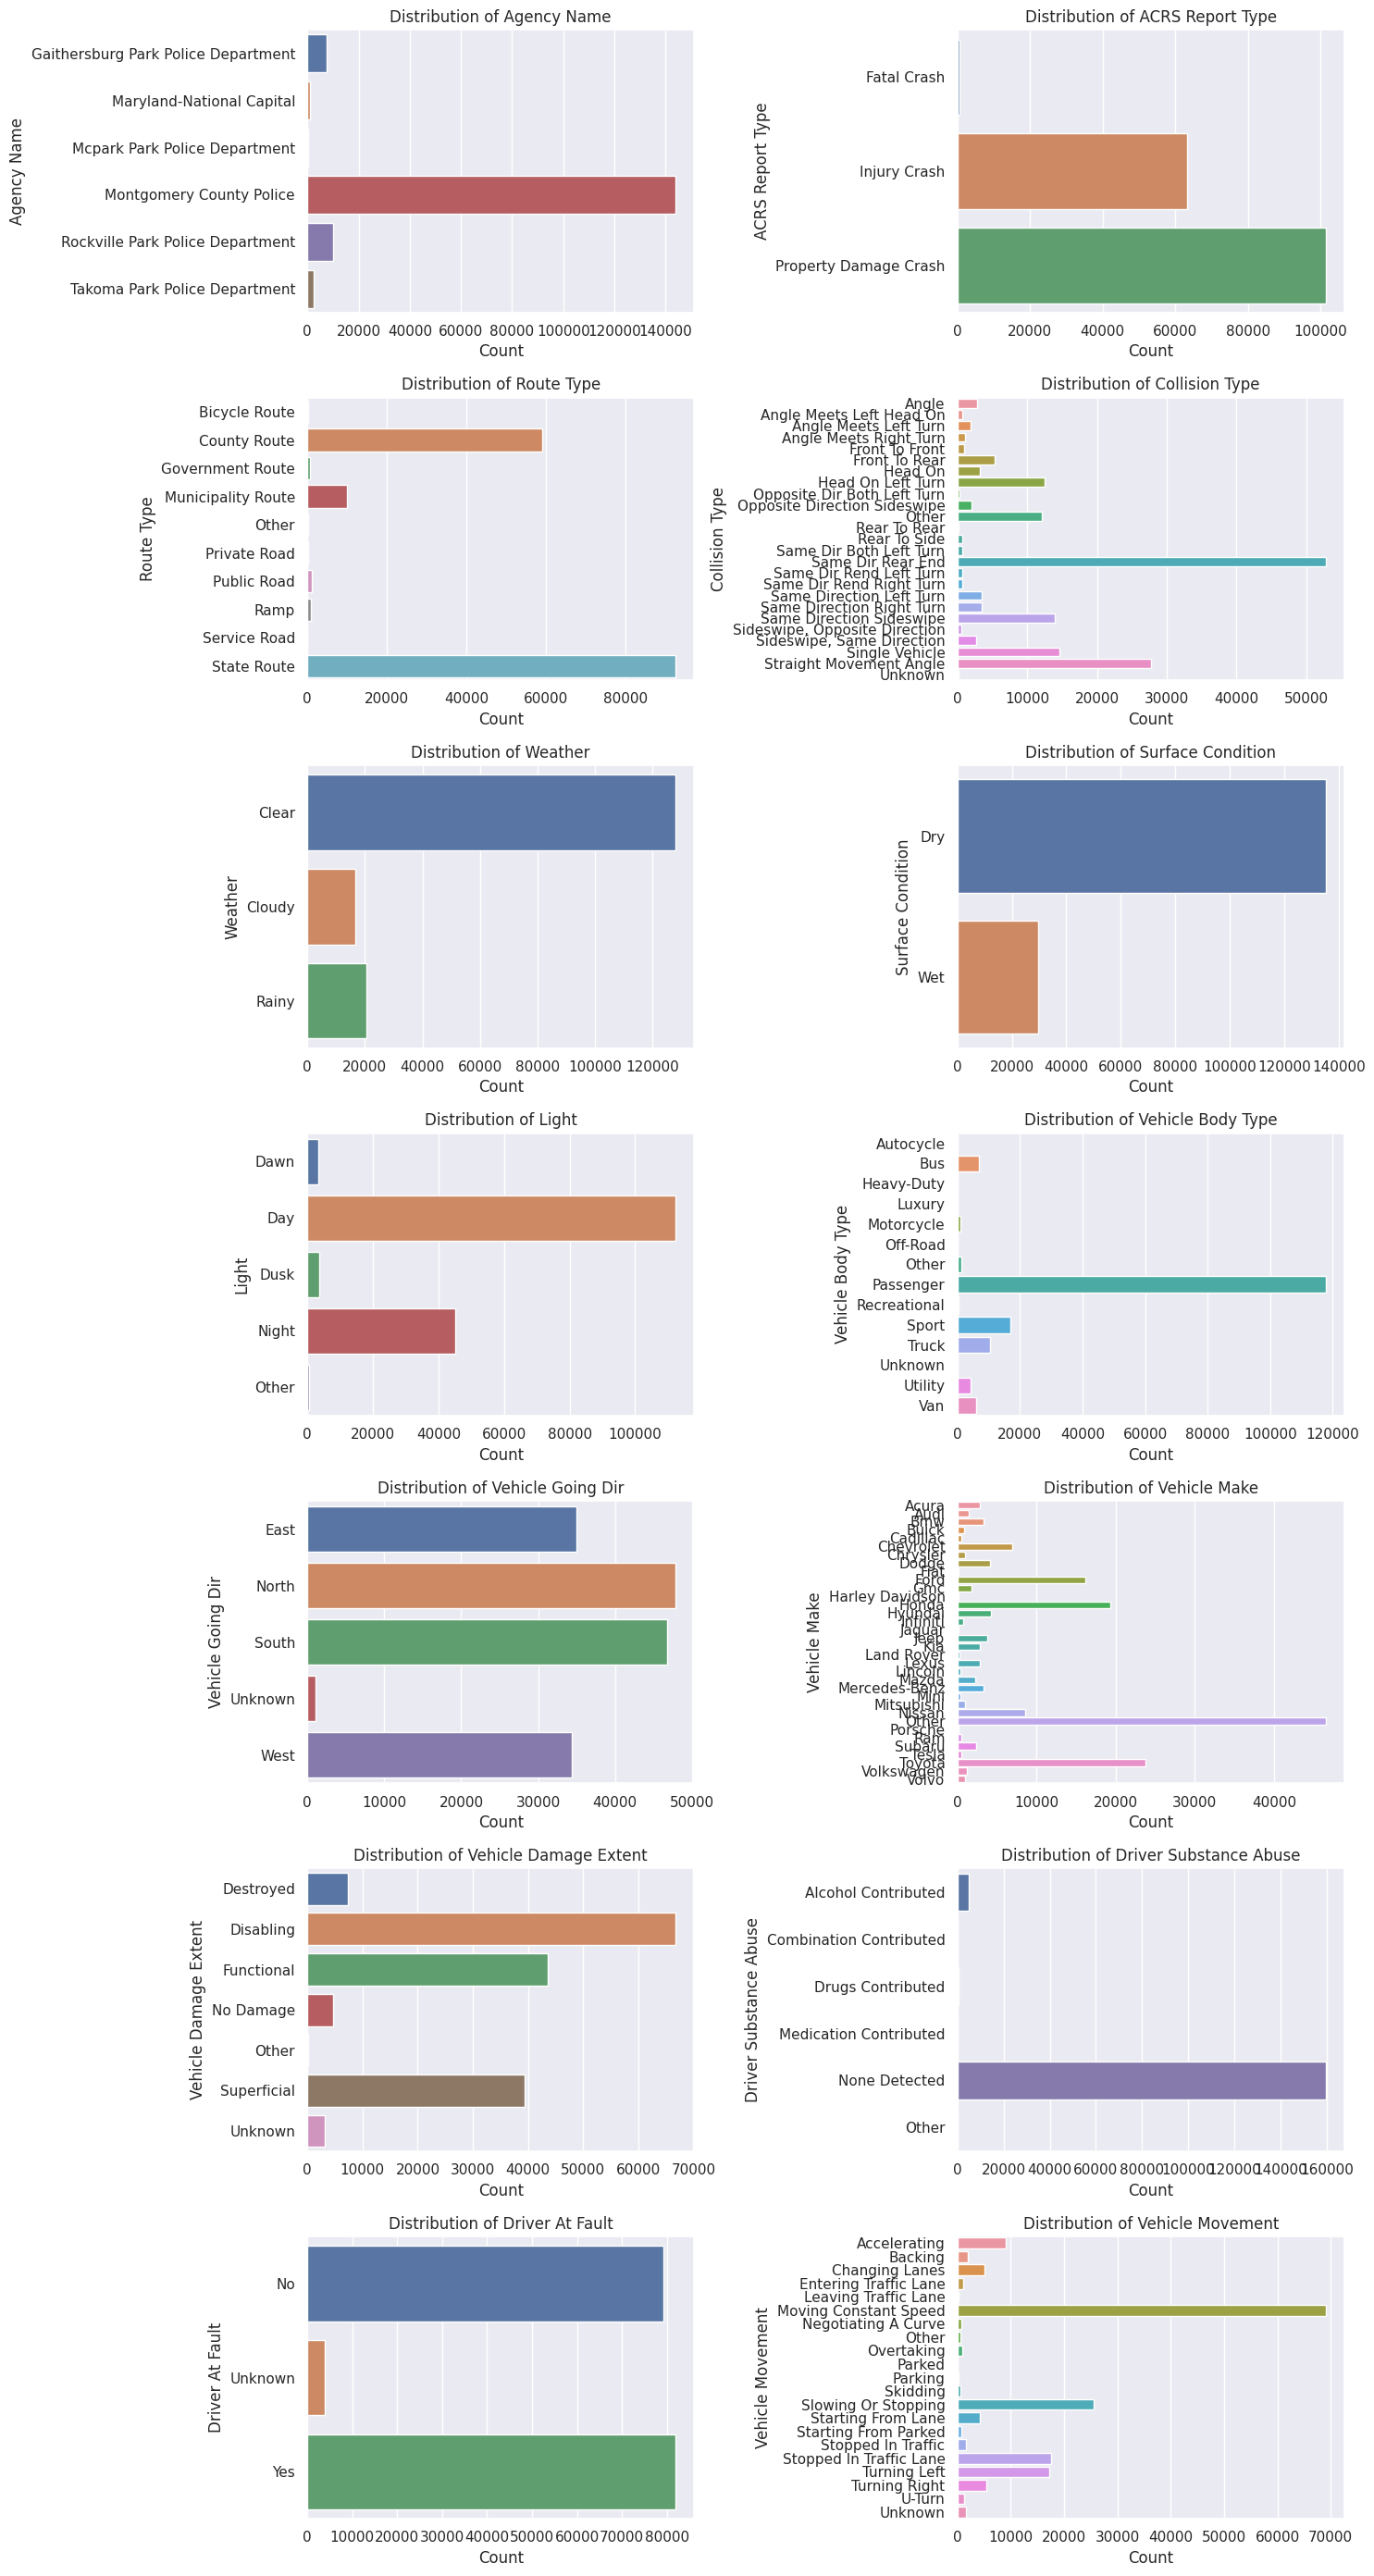

In [36]:
# List of categorical columns to inspect
categorical_columns = ['Agency Name', 'ACRS Report Type', 'Route Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Vehicle Body Type', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Damage Extent', 'Driver Substance Abuse', 'Driver At Fault', 'Vehicle Movement']

# Set up the subplot grid
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the data, there are clear imbalances, which arise from categorical assignments. The data in `Other` or `Unknown` rows within each column seems to dominate the values, which could skew our analysis. Thus it would be recommended to remove these dominating factors.

In [37]:
# Remove rows where "Other" dominates
threshold = 50 
columns_to_check = ['Vehicle Make', 'Collision Type', 'Vehicle Movement']
df_copy = df_copy[~df_copy[columns_to_check].apply(lambda row: any(row == 'Other'), axis=1)]

**INSIGHTS:** 

-  The data has obvious bias, as most of the incidents occured in Montgomery. This is evident by the imbalance of areas, roads, and conditions in the `Agency Name`, `Road Type`, and `Surface Type` columns. The bias exists, but could still be used during benchmark tests to compare the Montgomery data with datasets from other regions to identify unique or common factors contributing to crashes.

### 5.2 Numerical Values

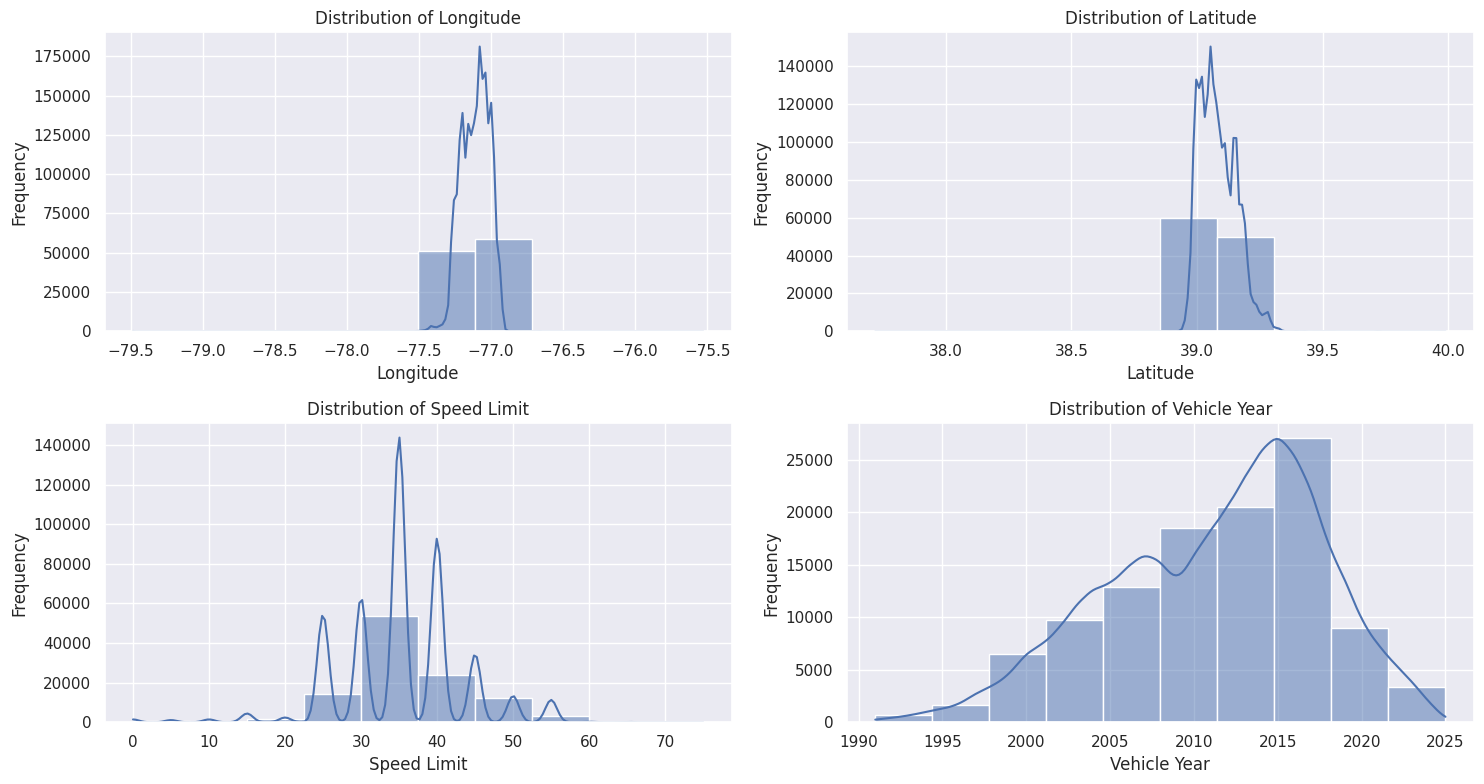

In [38]:

# List of numerical columns to inspect
numerical_columns = ['Longitude', 'Latitude', 'Speed Limit', 'Vehicle Year']

# Set up the subplot grid
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_copy[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**INSIGHTS:** 

-  The `Longitude` and `Latitude` values are skewed, which suggests that most incidents occurred in a concentrated geographic area. This could indicate a hotspot for incidents, which might be due to factors like high traffic density, specific road conditions, or local driving behaviors.

- The `Speed Limit` graphs have obvious 'waves', meaning these values repeat their pattern at regular intervals. Speed limits are often set at standardized values, such as 25, 30, 35, 40, 45, 50, 55, and 65 mph (or their equivalents in km/h), which makes this distribution make sense.

-  The `Vehicle Year` graph shows a right-skewed distribution, which means that more recently manufactured vehicles are involved in incidents. This could be due to the natural turnover of vehicles, where newer models are more prevalent on the roads.


<br>

## 6. Bivariate Analysis

The relationships between variables can be examined to uncover patterns, correlations, or associations. This will help determine whether there is a statistical relationship between two variables and, if so, the nature and strength of that relationship.

### 6.1 Numerical vs. Numeric

Correlation between Speed Limit and Vehicle Year: -0.03
Correlation between Speed Limit and Latitude: 0.14
Correlation between Vehicle Year and Vehicle Year: -0.03
Correlation between Vehicle Year and Latitude: -0.01


<Figure size 1500x1000 with 0 Axes>

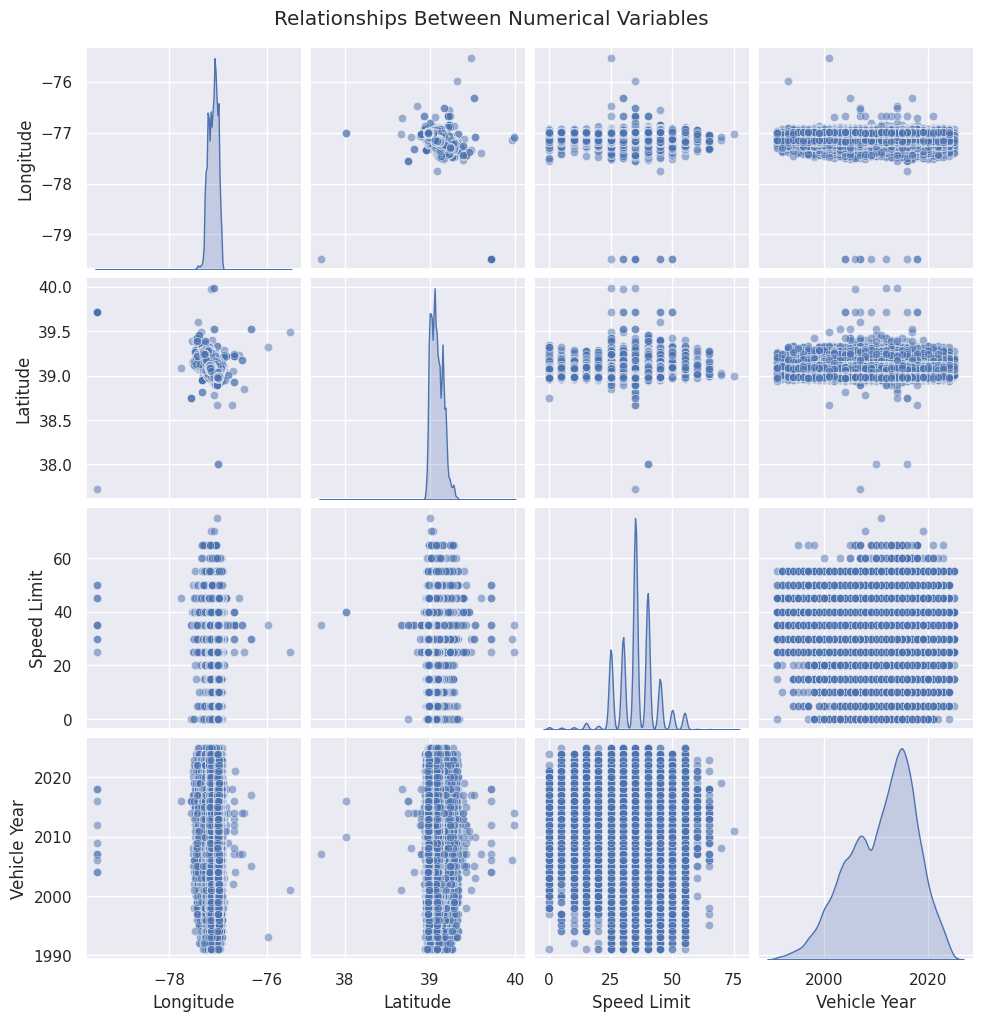

In [39]:
# List of numerical columns
numerical_columns = ['Longitude', 'Latitude', 'Speed Limit', 'Vehicle Year']

# Correlation
correlation = df_copy['Speed Limit'].corr(df_copy['Vehicle Year'])
print(f"Correlation between Speed Limit and Vehicle Year: {correlation:.2f}")
correlation = df_copy['Speed Limit'].corr(df_copy['Latitude'])
print(f"Correlation between Speed Limit and Latitude: {correlation:.2f}")
correlation = df_copy['Vehicle Year'].corr(df_copy['Longitude'])
print(f"Correlation between Vehicle Year and Vehicle Year: {correlation:.2f}")
correlation = df_copy['Vehicle Year'].corr(df_copy['Latitude'])
print(f"Correlation between Vehicle Year and Latitude: {correlation:.2f}")

# Create a pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(
    df_copy,
    vars=numerical_columns,  
    diag_kind='kde',  
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Relationships Between Numerical Variables', y=1.02)
plt.show()

**INSIGHTS:** 

- The clustering of `Longitude` and `Latitude` suggests that most car incidents occur in a specific geographical area. This could be due to high traffic density, specific road conditions, or local driving behaviors. There is a clear relationship between the two, which can help identify incidents and identify hotspots during analysis. 

- None of the other values, such as `Year` and `Speed` limit, appear to have a clear relationship. This observation is supported by the correlation data, which shows that a correlation close to 0 indicates a weak relationship between the values, even if it is slightly positive.

### 6.2 Categorical vs. Categorical

In [40]:
# 'Agency Name' and 'Driver Substance Abuse'
contingency_table = pd.crosstab(df_copy['Agency Name'], df_copy['Driver Substance Abuse'] )
display(contingency_table)

Driver Substance Abuse,Alcohol Contributed,Combination Contributed,Drugs Contributed,Medication Contributed,None Detected,Other
Agency Name,,,,,,
Gaithersburg Park Police Department,216,9,17,7,4510,0
Maryland-National Capital,14,0,2,1,482,0
Mcpark Park Police Department,1,0,0,0,133,0
Montgomery County Police,3158,82,208,80,93776,30
Rockville Park Police Department,143,2,10,8,5437,1
Takoma Park Police Department,37,2,2,1,1527,0


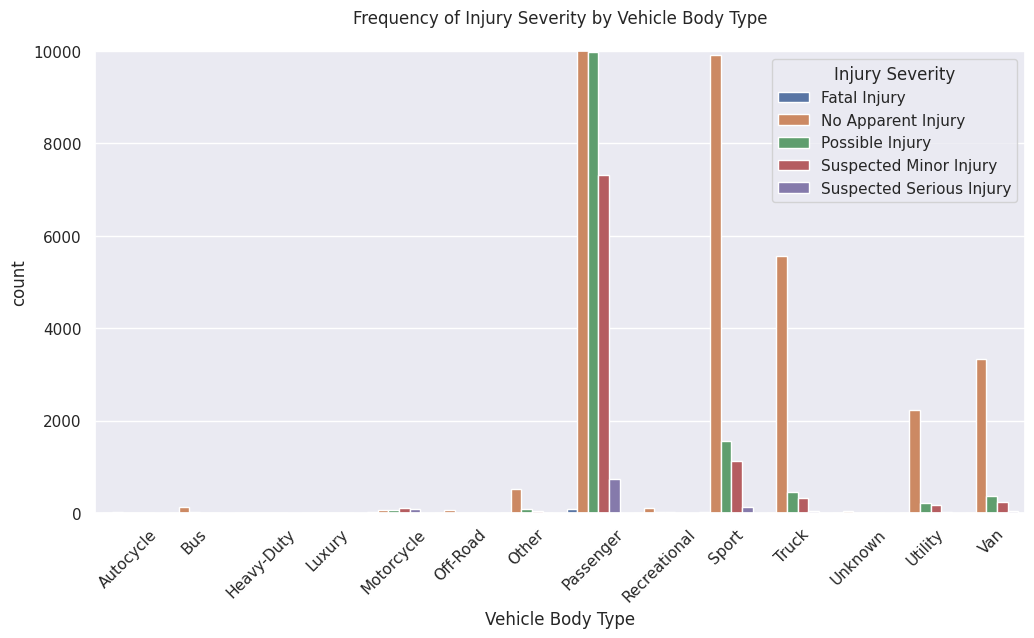

In [41]:
# Count plot for 'Vehicle Body Type' vs 'Injury Severity'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='Vehicle Body Type', hue='Injury Severity')
plt.title('Frequency of Injury Severity by Vehicle Body Type', pad=20)
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

In [42]:
# 'Light' and 'Damage'
contingency_table = pd.crosstab(df_copy['Light'], df_copy['Vehicle Damage Extent'])
display(contingency_table)

Vehicle Damage Extent,Destroyed,Disabling,Functional,No Damage,Other,Superficial,Unknown
Light,,,,,,,
Dawn,140,1036,535,37,1,390,44
Day,2760,30137,20918,1407,26,16327,1437
Dusk,145,971,640,42,0,589,70
Night,2349,15014,7251,461,15,6129,650
Other,20,116,101,5,1,95,37


**INSIGHTS:** 

**Driver Substance Abuse vs. Agency Name:**
- Alcohol and drugs is identified as the most prevalent involved in incidents, particularly in reports from Montgomery County and Gaithersburg. 
- By comparing the prevalence of alcohol-related incidents across different departments, we can identify areas with higher rates of substance abuse rates.

**Vehicle Body Type	vs. Inury Severity:**
- It's expected that passenger vehicles are the most prevalent in the dataset, as they are the most common type of vehicle on the road.
- The fact that sports cars are the second most common vehicle type in severe injuries suggests that drivers of these vehicles might engage in riskier driving behaviors, such as speeding or aggressive driving.

**Vehicle Damage Extent	vs. Light:**
- The fact that most vehicles are left in disabling conditions during the day and night suggests that these times might coincide with higher traffic volumes or more hazardous driving conditions. 
- Fewer disabling conditions during dusk and dawn might indicate lower traffic volumes or different driving behaviors during these times.
- By comparing the prevalence of incidents during peak times, we can identify times with higher incident rates.

### 6.3 Numerical vs. Categorical

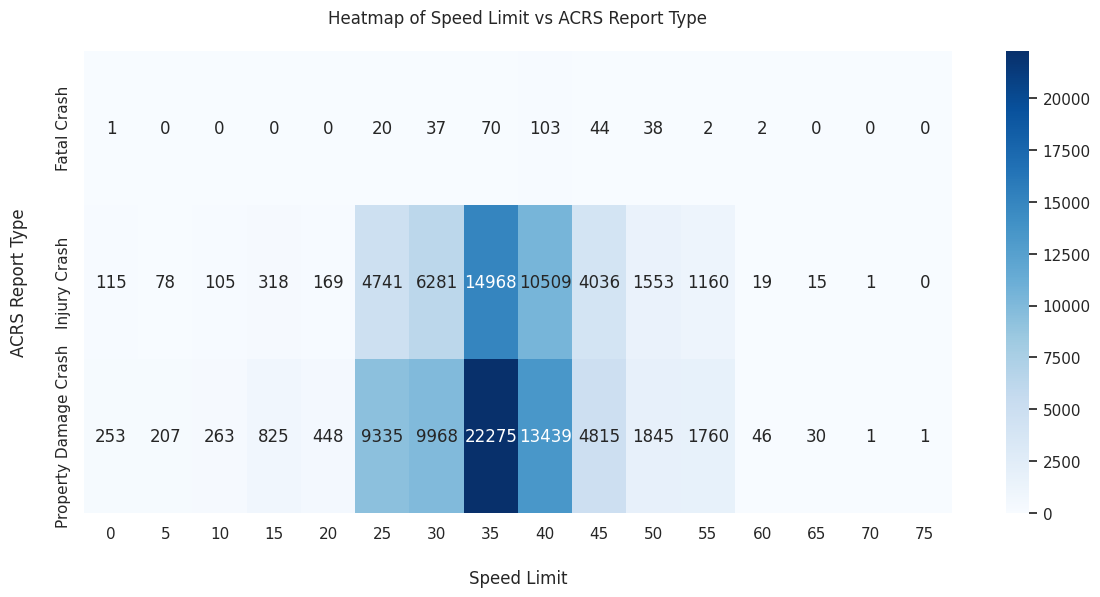

In [43]:
# Cross-tabulation of counts
cross_tab = pd.crosstab(df_copy['ACRS Report Type'], df_copy['Speed Limit'])
plt.figure(figsize=(14, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Speed Limit vs ACRS Report Type', pad=20)
plt.xlabel('Speed Limit', labelpad=20)
plt.ylabel('ACRS Report Type', labelpad=20)
plt.show()

In [44]:
# 'Speed Limit' and 'Damage'
contingency_table = pd.crosstab(df_copy['Speed Limit'], df_copy['Injury Severity'])
display(contingency_table)

Injury Severity,Fatal Injury,No Apparent Injury,Possible Injury,Suspected Minor Injury,Suspected Serious Injury
Speed Limit,,,,,
0,1,318,35,14,1
5,0,259,16,8,2
10,0,320,28,19,1
15,0,1015,74,47,7
20,0,527,48,35,7
...,...,...,...,...,...
55,1,2313,347,230,31
60,1,54,4,7,1
65,0,39,2,3,1


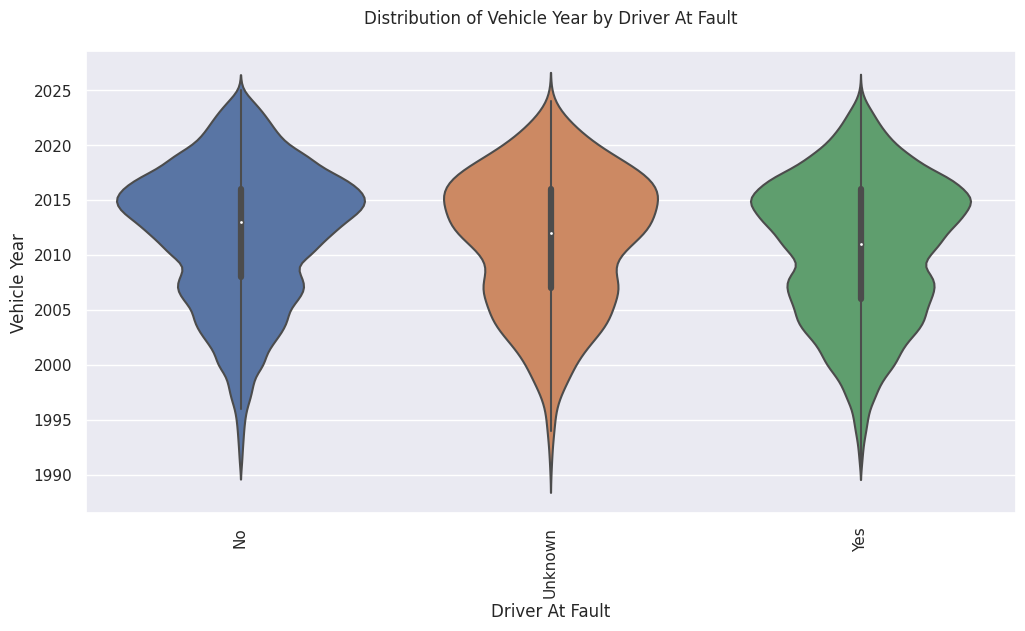

In [45]:
# Violin plot for 'Vehicle Year' by 'Driver At Fault'
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_copy, x='Driver At Fault', y='Vehicle Year')
plt.title('Distribution of Vehicle Year by Driver At Fault', pad=20)
plt.xticks(rotation=90)
plt.show()

**INSIGHTS:** 

**Speed Limit vs. Report Type:**
- The association of property damage and injury crashes with speed limits between 25-50 mph suggests that these speeds are common in areas where such incidents occur, likely urban or suburban settings.
- The concentration of accidents around the 35 mph mark might indicate a common speed limit in areas with frequent traffic interactions, such as intersections or busy streets.
- The lower frequency of fatal crashes in these areas might be due to lower speeds reducing the likelihood of fatalities, or it could reflect effective safety measures in place.

**Speed Limit vs. Inury Severity:**
- There is a clear pattern between higher speed limits and worse injury severity. 
- Low speed limits are more commonly associated with "No Apparent Injury", whereas high speed limits are more commonly associated with "Suspected Serious Injury"
- This suggests that lower speed limits, often found in residential or heavily trafficked areas, are effective in reducing the severity of injuries.

**Vehicle Year vs. Driver At Fault:**
- Across all categories ("No," "Unknown," "Yes"), vehicles from around 2010–2015 appear to dominate, as indicated by the widest parts of the violins.
- The distributions are fairly similar across categories, suggesting no major difference in vehicle manufacturing year based on fault status.
- The lack of a clear relationship between driver fault and vehicle year indicates that other factors, such as driver behavior or environmental conditions, might play a more significant role in determining fault.

<br>

## 7. Data Exploration & Visualization

In this section, we will analyze the data using visualizations to address the following questions:

**1. Route Types and Accidents:**
- Which route types have the highest frequency of accidents?

**2. Car Types in Accidents:**
- What are the most common car types involved in accidents?

**3. Frequency of Accidents:**
- Are certain car types more likely to be involved in accidents at specific times of the day or week?

**4. Agency and Substance-Induced Incidents:**
- Are there specific times or conditions under which substance-induced incidents are more prevalent?

**5. Environmental Conditions and Crash Frequency:**
- How do different weather conditions affect the frequency and severity of crashes?

**6. Vehicle Movement vs. Collision Type:**
- How does vehicle movement at the time of the accident affect the severity of the collision?

### 7.1. Route Types and Accidents

***Which route types have the highest frequency of accidents?***

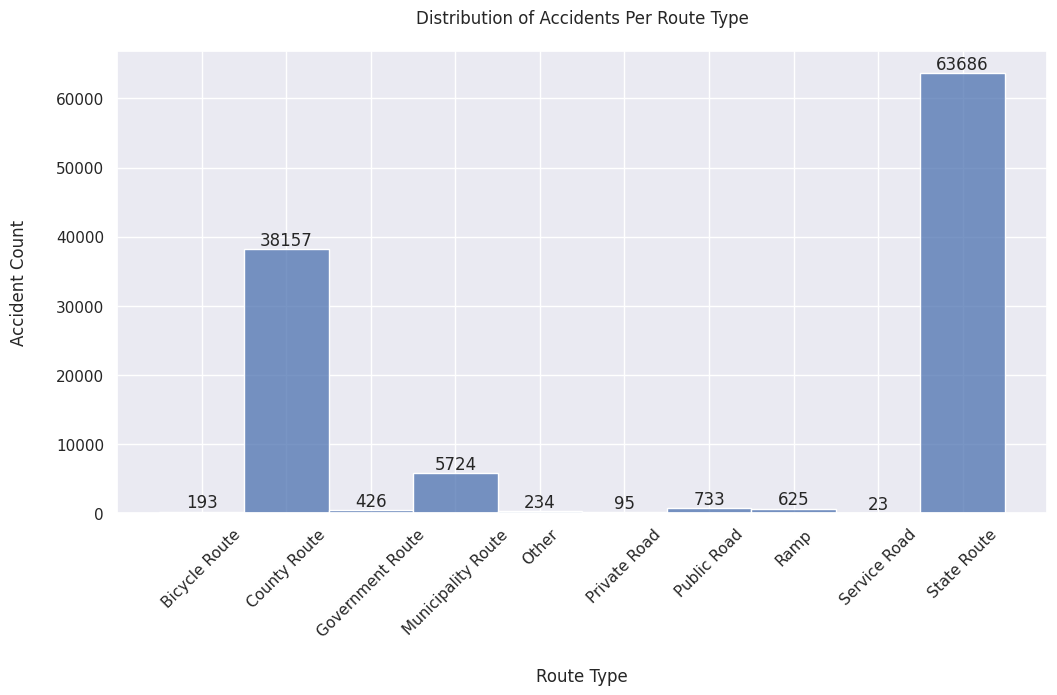

In [46]:
# Which route types have the highest frequency of accidents?
plt.figure(figsize=(12, 6))
ax = sns.histplot(df_copy, x="Route Type")
plt.title("Distribution of Accidents Per Route Type", pad=20)
plt.xlabel("Route Type", labelpad=20)
plt.ylabel("Accident Count", labelpad=20)
plt.xticks(rotation=45)
for bar in ax.patches:
    height = bar.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
plt.show()

# Aggregate data to get counts per route type and report type
route_report_counts = df_copy.groupby(['Route Type', 'ACRS Report Type'], observed=False).size().reset_index(name='Count')
fig = go.Figure()
for report_type in route_report_counts['ACRS Report Type'].unique():
    report_data = route_report_counts[route_report_counts['ACRS Report Type'] == report_type]
    fig.add_trace(go.Bar(
        x=report_data['Route Type'],
        y=report_data['Count'],
        name=report_type,
        hoverinfo='text',
        hovertext=[f"Route Type: {route}<br>ACRS Report Type: {report_type}<br>Count: {count}"
                   for route, count in zip(report_data['Route Type'], report_data['Count'])]
    ))
fig.update_layout(
    title='Accident Counts by Route Type and ACRS Report Type',
    xaxis_title='Route Type',
    yaxis_title='Accident Count',
    barmode='stack', 
    hovermode='x unified'
)
fig.show(renderer='iframe')

In [47]:
# Create a bar plot
fig = px.histogram(df_copy, x='ACRS Report Type', color='Light', barmode='group',
                   title='Distribution of ACRS Report Type by Time of Day',
                   labels={'ACRS Report Type': 'ACRS Report Type', 'count': 'Count'},
                   hover_data=['Route Type'])
fig.show(renderer='iframe')

In [48]:
# Create an interactive map
fig = px.scatter_mapbox(df_copy,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Vehicle Damage Extent',
                        hover_data=['Speed Limit'],
                        color='Speed Limit',
                        size='Speed Limit',
                        zoom=10,
                        mapbox_style='carto-positron',
                        title='Accidents by Location and Speed Limit')

fig.show(renderer='iframe')

**INSIGHTS:** 

**Common Route Types:**
- Most accidents occur on State Routes, with over 62,000 reports, largely due to biased data collection towards Maryland state roads. This suggests that while State Routes are significant for accident reporting, the data may not fully represent other regions. County routes follow with 37,000 accidents, and municipality routes have 5,660 accidents.
    - ***State Routes:*** These are major highways maintained by state governments, connecting larger cities and regions. They experience high traffic volumes, which contributes to the higher number of accidents.

    - ***County Routes:*** These are local roads maintained by county governments, connecting smaller communities and serving rural areas.

- The most common type of accident across all routes is property damage crashes, followed by injury crashes. Fatal crashes are less common. This indicates that while accidents are frequent, they often result in less severe outcomes.

- Most accidents occur either during the day or night, with fewer happening during dusk or dawn.

- Most property damage and injury crashes happen during the day, likely due to higher traffic volumes.

- Most accidents occured in areas where the average speed limit is between 30 - 50 mph.

- Fatal crashes are almost equally distributed between night (150 reports) and day (149 reports), suggesting that factors other than visibility, such as speed and driver fatigue, may contribute to their occurrence.


### 7.2. Car Types in Accidents:

***What are the most common car types involved in accidents?***

In [49]:
# Count the frequency of each vehicle body type
car_type_counts = df_copy['Vehicle Body Type'].value_counts().reset_index()
car_type_counts.columns = ['Vehicle Body Type', 'Count']

# Set a threshold for minimum count
threshold = 100

# Filter out vehicle body types with counts below the threshold
filtered_car_type_counts = car_type_counts[car_type_counts['Count'] >= threshold]

# Create a bar plot
fig = px.bar(filtered_car_type_counts, x='Vehicle Body Type', y='Count',
             title='Most Common Car Types Involved in Accidents',
             labels={'Count': 'Number of Accidents'})
fig.show(renderer='iframe')

In [50]:
# Count the frequency of each vehicle make
make_counts = df_copy['Vehicle Make'].value_counts().reset_index()
make_counts.columns = ['Vehicle Make', 'Count']
top_10_makes = make_counts.head(10)

# Count the frequency of each vehicle model
model_counts = df_copy['Vehicle Model'].value_counts().reset_index()
model_counts.columns = ['Vehicle Model', 'Count']
top_10_models = model_counts.head(10)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Vehicle Makes with Most Accidents', 'Top 10 Vehicle Models with Most Accidents'))

# Add bar plot for Vehicle Makes
fig.add_trace(go.Bar(x=top_10_makes['Vehicle Make'], y=top_10_makes['Count'], name='Vehicle Make'), row=1, col=1)

# Add bar plot for Vehicle Models
fig.add_trace(go.Bar(x=top_10_models['Vehicle Model'], y=top_10_models['Count'], name='Vehicle Model'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Vehicle Accidents Analysis', showlegend=False)
fig.update_xaxes(title_text='Vehicle Make', row=1, col=1)
fig.update_yaxes(title_text='Number of Accidents', row=1, col=1)
fig.update_xaxes(title_text='Vehicle Model', row=1, col=2)
fig.update_yaxes(title_text='Number of Accidents', row=1, col=2)

# Show the plot
fig.show(renderer='iframe')


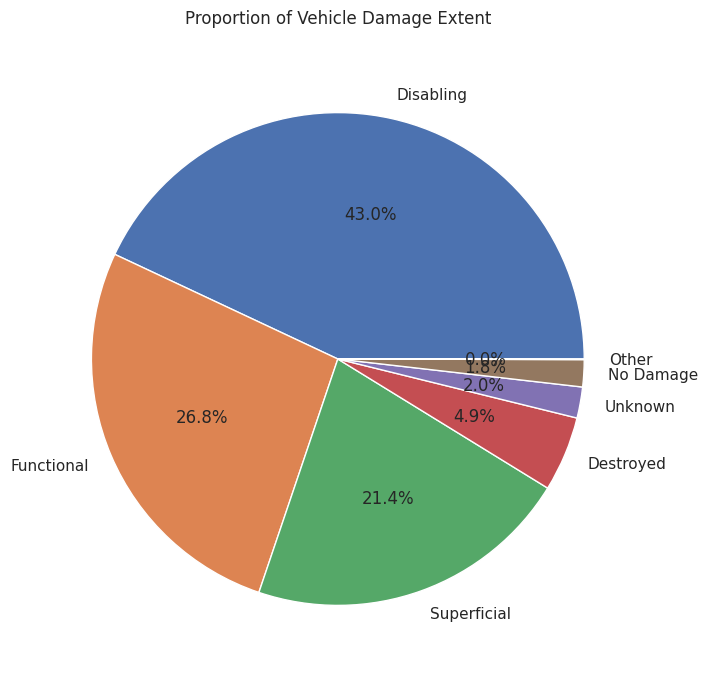

In [51]:
# Count the occurrences of each damage extent
damage_counts = df_copy['Vehicle Damage Extent'].value_counts()

# Plot
plt.figure(figsize=(14, 8))
damage_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Vehicle Damage Extent', pad=20)
plt.ylabel('')
plt.show()

In [52]:
# Cross-tabulation of car type and injury severity
severity_crosstab = pd.crosstab(df_copy['Vehicle Body Type'], df_copy['Injury Severity'])

# Create a heatmap
fig = px.imshow(severity_crosstab, text_auto=True, aspect='auto',
                title='Car Type vs. Accident Severity',
                labels=dict(x='Injury Severity', y='Vehicle Body Type', color='Count'))
fig.show(renderer='iframe')

In [53]:
# Aggregate data to get counts per vehicle body type and route type
car_route_counts = df_copy.groupby(['Vehicle Body Type', 'Route Type'], observed=False).size().reset_index(name='Count')

# Set a threshold for minimum count
threshold = 100

# Filter out vehicle body types with counts below the threshold
filtered_car_route_counts = car_route_counts[car_route_counts['Count'] >= threshold]

# Create a frequency table
frequency_table = filtered_car_route_counts.pivot(index='Vehicle Body Type', columns='Route Type', values='Count').fillna(0)

# Display the frequency table
display(frequency_table)

Route Type,County Route,State Route,Bicycle Route,Government Route,Municipality Route,Other,Public Road,Ramp
Vehicle Body Type,,,,,,,,
Motorcycle,129.0,199.0,0.0,0.0,0.0,0.0,0.0,0.0
Other,250.0,356.0,0.0,0.0,0.0,0.0,0.0,0.0
Passenger,28476.0,47981.0,157.0,340.0,4472.0,177.0,546.0,443.0
Sport,4594.0,7260.0,0.0,0.0,590.0,0.0,0.0,0.0
Truck,2155.0,3820.0,0.0,0.0,275.0,0.0,0.0,0.0
Utility,931.0,1501.0,0.0,0.0,146.0,0.0,0.0,0.0
Van,1432.0,2317.0,0.0,0.0,170.0,0.0,0.0,0.0


**INSIGHTS:** 

- The most common car type involved in accidents is passenger vehicles, followed by sports cars and trucks. This reflects the general distribution of vehicle types on the road, with passenger vehicles being the most prevalent.

- The most common vehicles involved in accidents are Toyota, Honda, and Ford. This is likely due to their popularity and high sales volumes, making them more frequently encountered on the roads.

- The most common vehicle models involved in accidents are the Toyota Camry, Honda Civic, Honda Accord, and Toyota Corolla. These models are among the best-selling cars, which correlates with their higher likelihood of being involved in accidents.

- Most accidents leave vehicles in disabling conditions, even if not functional or with superficial damage, which raises questions about vehicle quality and design. It could be that there is a higher focus on passenger safety, which often means that the vehicle itself takes more damage to minimize the impact on passengers, which is a trade-off in vehicle design.

- Most accidents result in no apparent injury, possible injury, or minor injuries. Fatal injuries are very rare, even in passenger cars. This suggests that modern vehicle safety features and regulations are effective in reducing the severity of injuries in accidents.

- State roads are the most common road type where accidents occur across all car types. This could be due to the higher traffic volumes and speeds typically found on state roads compared to local streets.


### 7.3. Frequency of Accidents:
***Are accidents more prevalent at specific times of the day or week?***

In [54]:
# Convert 'Time' to datetime format
df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S')

# Round times to the nearest hour
df_copy['Rounded Time'] = df_copy['Time'].dt.round('h').dt.time

# Aggregate data to get counts per vehicle body type and rounded hour
car_hour_counts = df_copy.groupby(['Vehicle Body Type', 'Rounded Time'], observed=False).size().reset_index(name='Count')

# Create a line plot
fig = px.line(car_hour_counts, x='Rounded Time', y='Count', color='Vehicle Body Type',
              title='Accident Frequency by Car Type and Time of Day',
              labels={'Count': 'Number of Accidents'})
fig.show(renderer='iframe')

In [55]:
# Extract year, month, and day into separate columns
df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Day'] = df_copy['Date'].dt.day

# Yearly Plot
yearly_counts = df_copy.groupby('Year', observed=False).size().reset_index(name='Count')
fig_yearly = px.line(yearly_counts, x='Year', y='Count',
                     title='Accident Frequency by Year',
                     labels={'Count': 'Number of Accidents'})
fig_yearly.show(renderer='iframe')

In [56]:
# Filter data for the specific year 2024
df_2024 = df_copy[df_copy['Year'] == 2024]

# Aggregate data to get counts per vehicle body type and month for the year 2024
monthly_counts_2024 = df_2024.groupby(['Vehicle Body Type', 'Month'],  observed=False).size().reset_index(name='Count')

# Create a line plot
fig_monthly = px.line(monthly_counts_2024, x='Month', y='Count', color='Vehicle Body Type',
                      title='Accident Frequency by Month and Car Type for 2024',
                      labels={'Count': 'Number of Accidents', 'Month': 'Month'})

# Show the plot
fig_monthly.show(renderer='iframe')

In [57]:
# Aggregate data to get counts per day
daily_counts = df_copy.groupby(['Year', 'Month', 'Day'],  observed=False).size().reset_index(name='Count')

# Create a box plot
fig_box = px.box(daily_counts, x='Day', y='Count', color='Day',
                 title='Distribution of Daily Accident Frequency by Day',
                 labels={'Count': 'Number of Accidents', 'Day': 'Day'})

# Show the plot
fig_box.show(renderer='iframe')

In [58]:
# Aggregate data to get counts per vehicle body type and month
daily_counts = df_2024.groupby(['Vehicle Body Type', 'Day'], observed=False).size().reset_index(name='Count')

# Create a line plot
fig_daily = px.line(daily_counts, x='Day', y='Count', color='Vehicle Body Type',
                      title='Accident Frequency by Day of Month and Car Type',
                      labels={'Count': 'Number of Accidents', 'Day': 'Day'})

# Show the plot
fig_daily.show(renderer='iframe')

**INSIGHTS:** 

-  Accidents increase around 8 AM, peak at 5 PM, and then gradually decline. This pattern aligns with typical commuting hours, indicating that traffic congestion during morning and evening rush hours contributes significantly to the number of accidents.

- In years where travel is less required, such as during the pandemic, the number of accidents decreases. This suggests that reduced vehicle usage directly correlates with fewer accidents, highlighting the impact of travel volume on road safety.

- Most accidents occur during the 5th (May) and 9th (September) months of the year. This could be due to various factors such as weather conditions, holiday travel, or seasonal changes in traffic patterns.

- There is no clear pattern between the day of the month and the number of accidents, indicating that daily accident occurrences are more random and not significantly influenced by specific days.

### 7.4. Agency and Substance-Induced Incidents:
***Are there specific times or conditions under which substance-induced incidents are more prevalent?***

In [59]:
# Filter for substance-induced incidents
substance_incidents = df_copy[df_copy['Driver Substance Abuse'] != 'None Detected']

# Aggregate data to get counts per agency
agency_counts = substance_incidents['Agency Name'].value_counts().reset_index()
agency_counts.columns = ['Agency Name', 'Count']

# Create a bar plot
fig_agency = px.bar(agency_counts, x='Agency Name', y='Count',
                    title='Substance-Induced Incidents by Agency',
                    labels={'Count': 'Number of Incidents'})
fig_agency.show(renderer='iframe')

In [60]:
# Aggregate data to get counts per agency and substance type
agency_substance_counts = substance_incidents.groupby(['Agency Name', 'Driver Substance Abuse'], observed=False).size().reset_index(name='Count')

# Create a grouped bar plot
fig_agency_substance = px.bar(agency_substance_counts, x='Agency Name', y='Count', color='Driver Substance Abuse',
                              barmode='group',
                              title='Substance-Induced Incidents by Agency and Substance Type',
                              labels={'Count': 'Number of Incidents'})
fig_agency_substance.show(renderer='iframe')

In [61]:
# Convert 'Time' to datetime and extract the hour
substance_incidents.loc[:, 'Time'] = pd.to_datetime(substance_incidents['Time'], format='%H:%M')
substance_incidents.loc[:, 'Hour'] = substance_incidents['Time'].dt.hour

# Aggregate data to get counts per hour
hourly_counts = substance_incidents.groupby('Hour', observed=False).size().reset_index(name='Count')

# Create a line plot for time analysis
fig_hourly = px.line(hourly_counts, x='Hour', y='Count',
                     title='Substance-Induced Incidents by Hour',
                     labels={'Count': 'Number of Incidents', 'Hour': 'Hour of Day'})
fig_hourly.show(renderer='iframe')

<ipython-input-61-bf45f2fef68e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**INSIGHTS:** 

- Montgomery reports the highest number of substance-induced accidents, but this is attributed to a bias in data collection. This suggests that the actual prevalence of substance-induced accidents might be more evenly distributed across different regions, but reporting practices or enforcement intensity in Montgomery skew the data.

- Alcohol consumption is the leading cause of substance-induced accidents. This aligns with broader research indicating that alcohol impairs judgment and reaction times, significantly increasing the risk of accidents.

- Most substance abuse-related accidents occur between 5 PM and 2 AM. This timeframe coincides with social activities and nightlife, where alcohol consumption is more prevalent. During the day, these types of accidents are less common, likely due to reduced alcohol consumption and increased law enforcement presence.

### 7.5. Environmental Conditions and Crash Frequency:
***How do different weather conditions affect the frequency and severity of crashes?***

In [62]:
# Aggregate data to get counts per road condition
surface_condition_counts = df_copy['Surface Condition'].value_counts().reset_index()
surface_condition_counts.columns = ['Surface Condition', 'Count']

# Create a bar plot
fig_srface_condition = px.bar(surface_condition_counts, x='Surface Condition', y='Count',
                            title='Accidents by Surface Condition',
                            labels={'Count': 'Number of Accidents'})
fig_srface_condition.show(renderer='iframe')

In [63]:
# Cross-tabulation of environmental conditions and collision types
collision_crosstab = pd.crosstab(df_copy['Weather'], df_copy['Collision Type'])

# Create a heatmap
fig_collision = px.imshow(collision_crosstab, text_auto=True, aspect='auto',
                          title='Collision Type by Weather',
                          labels=dict(x='Collision Type', y='Weather', color='Count'))
fig_collision.show(renderer='iframe')

In [64]:
# Aggregate data to get counts per vehicle movement and collision type
movement_collision_counts = df_copy.groupby(['Vehicle Movement', 'Collision Type'],  observed=False).size().reset_index(name='Count')

# Create a grouped bar plot
fig_movement_collision = px.bar(movement_collision_counts, x='Vehicle Movement', y='Count', color='Collision Type',
                                barmode='stack',
                                title='Collision Type by Vehicle Movement',
                                labels={'Count': 'Number of Collisions'})
fig_movement_collision.show(renderer='iframe')

**INSIGHTS:** 
- Most accidents occur on dry surfaces. This suggests that while wet or icy conditions are often considered more dangerous, the sheer volume of traffic on dry days contributes to a higher number of accidents.

- Clear Weather: The most frequent collision type is "Same Direction Both Left Turn," with 29,215 incidents. Single-vehicle accidents are also notably high, with 15,174 incidents. This indicates that even in optimal weather conditions, driver errors or misjudgments during turns can lead to accidents.

- Cloudy Weather: "Same Direction Both Left Turn" remains the most frequent collision type, with 3,704 incidents. This suggests that visibility issues or driver caution might not significantly alter the types of collisions.

- Rainy Weather: Again, "Same Direction Both Left Turn" is the most frequent collision type, with 4,566 incidents. This highlights that even in adverse weather, the pattern of collisions remains consistent.

- Across all weather conditions, "Same Direction Both Left Turn" is the most common collision type. Single-vehicle collisions are also high, especially in clear and rainy weather. This suggests that left-turn maneuvers are particularly risky, possibly due to misjudgment of oncoming traffic or failure to yield.

### 7.6. Vehicle Movement vs. Collision Type:
***How does vehicle movement at the time of the accident affect the severity of the collision?***

In [65]:
# Aggregate data to get counts per vehicle movement and collision type
movement_collision_counts = df_copy.groupby(['Vehicle Movement', 'Collision Type'], observed=False).size().reset_index(name='Count')

# Set a threshold for minimum count
threshold = 500 

# Filter out vehicle details with counts below the threshold
filtered_details_counts = movement_collision_counts[movement_collision_counts['Count'] >= threshold]

# Create a grouped bar plot
fig_movement_collision = px.bar(filtered_details_counts, x='Vehicle Movement', y='Count', color='Collision Type',
                                barmode='group',
                                title='Collision Type by Vehicle Movement',
                                labels={'Count': 'Number of Collisions'})
fig_movement_collision.show(renderer='iframe')

In [66]:
# Cross-tabulation of vehicle movement and collision severity
severity_crosstab = pd.crosstab(df_copy['Vehicle Movement'], df_copy['Injury Severity'])

# Create a heatmap
fig_severity = px.imshow(severity_crosstab, text_auto=True, aspect='auto',
                         title='Injury Severity by Vehicle Movement',
                         labels=dict(x='Injury Severity', y='Vehicle Movement', color='Count'))
fig_severity.show(renderer='iframe')

**INSIGHTS:** 

- Most accidents occur when vehicles are slowing down, stopped, or moving at a constant speed. This is consistent with the findings that rear-end collisions are prevalent, often happening when one vehicle strikes another from behind.

- The injuries resulting from these accidents are generally less severe, with most being minor or resulting in no injury. This is because rear-end crashes, while frequent, tend to be less severe compared to other types of collisions.

- Rear-end accidents are the most common type of collision, indicating that they often occur when one vehicle strikes another from behind. This is supported by studies showing that rear-end crashes constitute a significant portion of total crashes and are associated with less severe injuries.

## 8. Final Conclusion

In this exploratory data analysis of Car Crash Reports, we delved into various factors influencing vehicle accidents to uncover patterns and insights that can inform safety measures and policy decisions.

### Key Factors:

#### 1. Route Types and Accidents:
- **High Frequency on State Routes**: State Routes have the highest frequency of accidents, primarily due to high traffic volumes and biased data collection towards Maryland state roads. County and municipality routes follow in frequency.

- **Speed Limit Influence**: Most accidents occur in areas where the average speed limit is between 30 and 50 mph.

- **Safety Improvements Needed**: This highlights the need for targeted safety improvements on major highways, such as enhanced signage, road maintenance, speed bumps, and roundabouts to mitigate accident risks.

#### 2. Car Types in Accidents:
- **Common Vehicle Types**: Passenger vehicles are the most common car type involved in accidents, followed by sports cars and trucks. Toyota, Honda, and Ford are the most frequently involved makes.

- **Vehicle Damage vs. Passenger Safety**: Vehicles tend to sustain more damage than passengers, with most vehicles being left in a disabled state, whereas passengers typically experience no to minor injuries.

- **Focus on Safety Features**: The prevalence of these vehicles in accidents suggests a focus on promoting advanced safety features and driver education for these popular models.

#### 3. Frequency of Accidents:
- **Peak Times**: Accidents peak during morning and evening rush hours, with a notable increase in May and September. There is no clear pattern related to the day of the month.

- **Traffic Management Strategies**: Implementing strategies such as staggered work hours and improved public transportation can help reduce congestion-related accidents.

#### 4. Agency and Substance-Induced Incidents:
- **Prevalence of Substance-Induced Incidents**: These incidents, primarily due to alcohol, are more prevalent between 5 PM and 2 AM.

- **Deterrence Measures**: Increasing law enforcement presence and public awareness campaigns during these hours can help deter driving under the influence.

#### 5. Environmental Conditions and Crash Frequency:
- **Common Conditions**: Most accidents occur on dry surfaces and during clear weather, with "Same Direction Both Left Turn" being the most common collision type.

- **Driver Education**: Educating drivers on safe turning practices and improving traffic signal timing can reduce these types of collisions.

#### 6. Vehicle Movement vs. Collision Type:
- **Rear-End Collisions**: These are common when vehicles are slowing down or stopped, often resulting in minor injuries.

- **Mitigation Strategies**: Implementing rear-signaling countermeasures and promoting defensive driving can mitigate the impact of these collisions.

### Overall Implications:

This analysis underscores the importance of understanding the multifaceted nature of vehicle accidents, including route types, vehicle characteristics, and environmental conditions. By leveraging these insights, policymakers and transportation authorities can implement targeted interventions to enhance road safety, reduce accident rates, and minimize injury severity. Emphasizing driver education, infrastructure improvements, and data-driven policy decisions will be crucial in achieving these goals.